# Predictive Analysis for Stock Price Movements with Istanbul dataset

In [1]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

C:\Users\91730\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# loading data
dataset = pd.read_csv("data_akbilgic.csv")

In [3]:
# Printing first few data values
dataset.head()

,date,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,05-Jan-09,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,06-Jan-09,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,07-Jan-09,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,08-Jan-09,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,09-Jan-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [4]:
# Checking for null values
dataset.isna().sum()

date       0
ISE        0
ISE.1      0
SP         0
DAX        0
FTSE       0
NIKKEI     0
BOVESPA    0
EU         0
EM         0
dtype: int64

In [5]:
# Checking for data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     536 non-null    object 
 1   ISE      536 non-null    float64
 2   ISE.1    536 non-null    float64
 3   SP       536 non-null    float64
 4   DAX      536 non-null    float64
 5   FTSE     536 non-null    float64
 6   NIKKEI   536 non-null    float64
 7   BOVESPA  536 non-null    float64
 8   EU       536 non-null    float64
 9   EM       536 non-null    float64
dtypes: float64(9), object(1)
memory usage: 42.0+ KB


In [6]:
# Data value counts for SP
dataset['SP'].value_counts()

 0.000000    18
-0.004679     1
 0.010916     1
-0.017314     1
 0.025514     1
             ..
 0.008806     1
 0.013032     1
 0.008499     1
-0.003302     1
-0.020742     1
Name: SP, Length: 519, dtype: int64

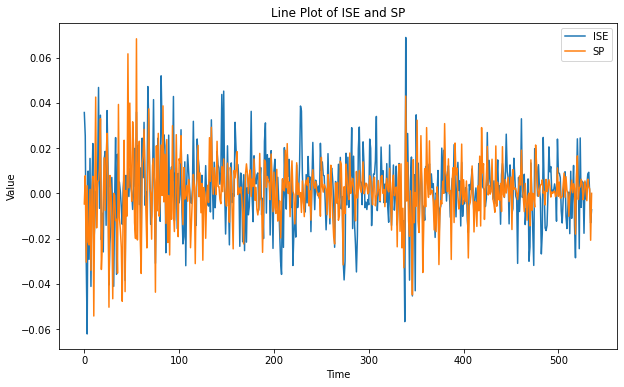

In [7]:
# Plotting Line plot for 'ISE' and 'SP'
plt.figure(figsize=(10, 6))
plt.plot(dataset['ISE'], label='ISE')
plt.plot(dataset['SP'], label='SP')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Line Plot of ISE and SP')
plt.legend()
plt.show()

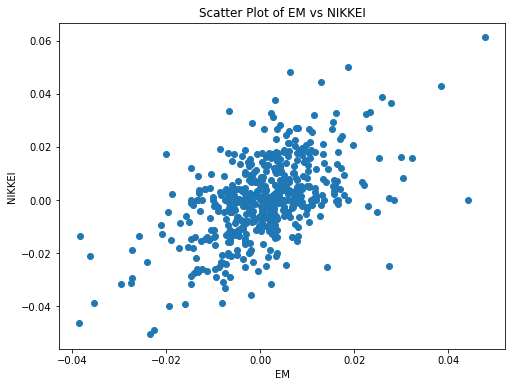

In [8]:
# Plotting Scatter plot for 'EM' and 'NIKKEI'
plt.figure(figsize=(8, 6))
plt.scatter(dataset['EM'], dataset['NIKKEI'])
plt.xlabel('EM')
plt.ylabel('NIKKEI')
plt.title('Scatter Plot of EM vs NIKKEI')
plt.show()

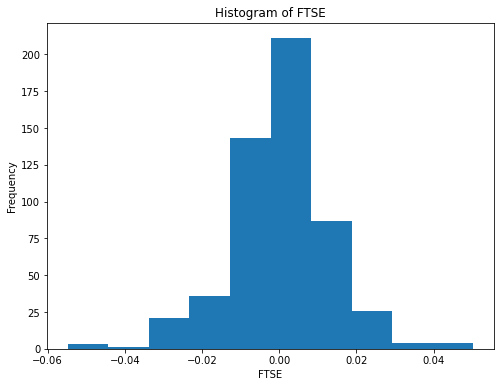

In [9]:
# Plotting Histogram for 'FTSE'
plt.figure(figsize=(8, 6))
plt.hist(dataset['FTSE'], bins=10)
plt.xlabel('FTSE')
plt.ylabel('Frequency')
plt.title('Histogram of FTSE')
plt.show()

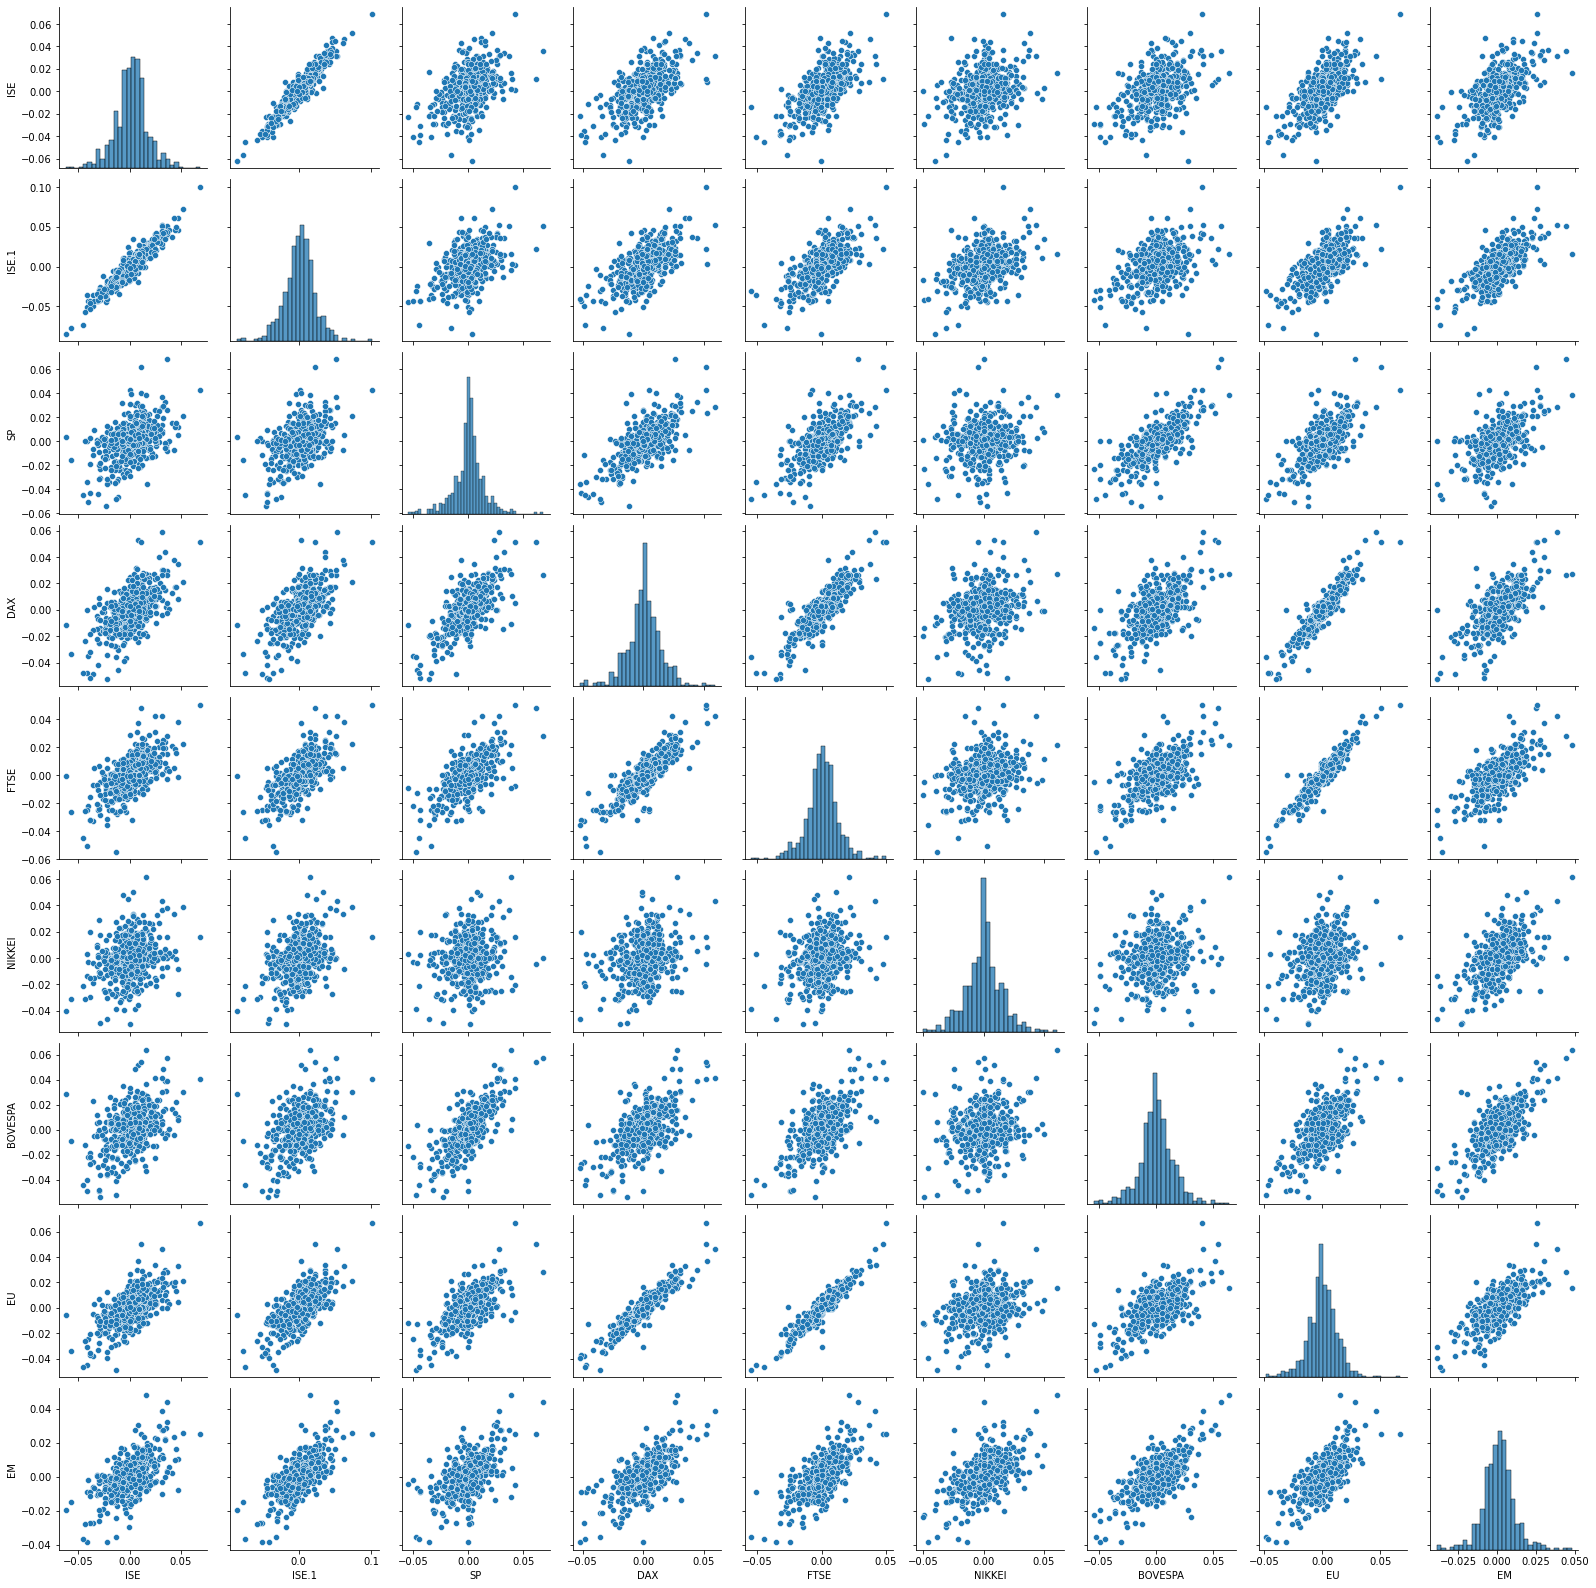

In [10]:
# Plotting pairplot
sns.pairplot(dataset)

In [11]:
# Dropping "date" column
dataset.drop('date',axis=1,inplace=True)

<AxesSubplot:>

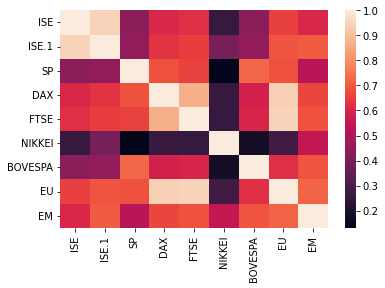

In [12]:
# plotting heatmap
sns.heatmap(dataset.corr())

In [13]:
# Setting features and targets
X=dataset.drop('EM',axis=1)
y=dataset['EM']

In [14]:
# Training - Testing Split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [15]:
# Training and Fitting a linear Regressoin Model
LinearModel = LinearRegression()
LinearModel.fit(X_train, y_train)

LinearRegression()

In [16]:
# Making predictions
LR_predictions = LinearModel.predict(X_test)

In [17]:
# Calculating metrics for Linear Regression Model
LR_MSE = mean_squared_error(y_test, LR_predictions)
LR_RMSE = mean_squared_error(y_test, LR_predictions, squared=False)
LR_MAE = mean_absolute_error(y_test, LR_predictions)
LR_R2 = r2_score(y_test, LR_predictions)

In [18]:
# Training and fitting a Random Forest Model
RandomForestModel = RandomForestRegressor(n_estimators=100, random_state=101)
RandomForestModel.fit(X_train, y_train)

RandomForestRegressor(random_state=101)

In [19]:
# Making Predictions for Random Forest
RF_Predictions = RandomForestModel.predict(X_test)

In [20]:
# Scaling the Data for LSTM
scaler = MinMaxScaler()
ScaledXTrain = scaler.fit_transform(X_train)
ScaledXTest = scaler.transform(X_test)
ytrainScaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
ytestScaled = scaler.transform(y_test.values.reshape(-1, 1))

In [21]:
# Reshaping data
ReshapingXtrain = ScaledXTrain.reshape((ScaledXTrain.shape[0], 1, ScaledXTrain.shape[1]))
ReshapingXtest = ScaledXTest.reshape((ScaledXTest.shape[0], 1, ScaledXTest.shape[1]))

In [22]:
# Implementing LSTM
LSTModel = Sequential()
LSTModel.add(LSTM(50, input_shape=(ReshapingXtrain.shape[1], ReshapingXtrain.shape[2])))
LSTModel.add(Dense(1))
LSTModel.compile(optimizer='adam', loss='mse')
LSTModel.fit(ReshapingXtrain, ytrainScaled, epochs=50, batch_size=32, verbose=0)

C:\Users\91730\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# Making Predictions for LSTM
ScaledLSTMPredictions = LSTModel.predict(ReshapingXtest)
LSTM_Predictions = scaler.inverse_transform(ScaledLSTMPredictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


In [24]:
# Printing Accuracy Metrics
models = ['Linear Regression', 'Random Forest', 'LSTM']
predictions = [LR_predictions, RF_Predictions, LSTM_Predictions]
for i in range(3):
    print(f"\n--- {models[i]} ---")
    mse = mean_squared_error(y_test, predictions[i])
    rmse = mean_squared_error(y_test, predictions[i], squared=False)
    mae = mean_absolute_error(y_test, predictions[i])
    r2 = r2_score(y_test, predictions[i])
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared:", r2)


--- Linear Regression ---
Mean Squared Error (MSE): 3.135206679335864e-05
Root Mean Squared Error (RMSE): 0.005599291633176347
Mean Absolute Error (MAE): 0.003942762960946916
R-squared: 0.7864618562204734

--- Random Forest ---
Mean Squared Error (MSE): 3.874083741518117e-05
Root Mean Squared Error (RMSE): 0.006224213798961373
Mean Absolute Error (MAE): 0.004615975581666667
R-squared: 0.7361371240809352

--- LSTM ---
Mean Squared Error (MSE): 3.431353785098744e-05
Root Mean Squared Error (RMSE): 0.005857775845061626
Mean Absolute Error (MAE): 0.004163612679009664
R-squared: 0.7662913508221879


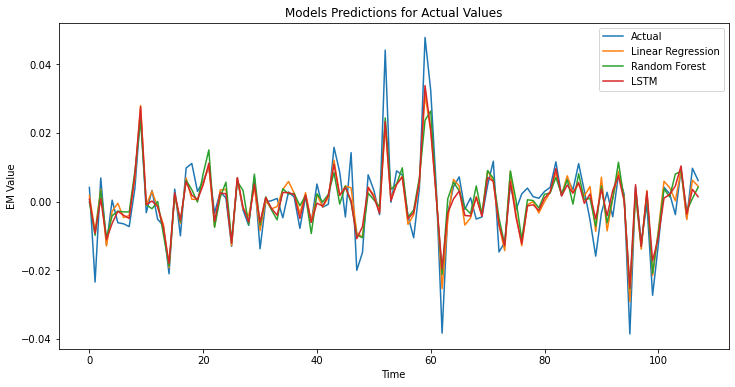

In [25]:
# Plotting Models performance
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(LR_predictions, label='Linear Regression')
plt.plot(RF_Predictions, label='Random Forest')
plt.plot(LSTM_Predictions, label='LSTM')
plt.xlabel('Time')
plt.ylabel('EM Value')
plt.title('Models Predictions for Actual Values')
plt.legend()
plt.show()